# Thử nghiệm code final project


### Lệnh gdown để tải xuống file *.csv từ link nguồn.

In [3]:
# !gdown "https://drive.google.com/uc?id=1M--59-dC344HcyplPswILKWuef-E_lny"

### Import thư viện

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import KNear
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [6]:
url = 'Malware_subset.csv'
malware_subset_data = pd.read_csv(url)

In [7]:
print(malware_subset_data.describe())

         Source Port   Destination Port       Protocol   Flow Duration  \
count  834695.000000      834695.000000  834695.000000    8.346950e+05   
mean    39007.782771        5483.783997       8.339229    1.047378e+07   
std     18278.671101       14767.261413       4.578223    2.141180e+07   
min         0.000000           0.000000       0.000000   -1.000000e+00   
25%     34370.000000          80.000000       6.000000    4.856250e+04   
50%     43451.000000         443.000000       6.000000    5.137490e+05   
75%     52601.000000         443.000000       6.000000    1.049577e+07   
max     65534.000000       65401.000000      17.000000    1.200000e+08   

        Total Fwd Packets   Total Backward Packets  \
count       834695.000000            834695.000000   
mean            10.573990                15.303788   
std             89.460453               202.784360   
min              1.000000                 0.000000   
25%              1.000000                 0.000000   
50%      

### Lấy data X, y

In [9]:
features_data = [' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std',
       ' Flow IAT Std', ' Flow IAT Max',
       'Fwd IAT Total', ' Fwd IAT Std',
       ' Fwd IAT Max', 
       ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       ' PSH Flag Count', ' ACK Flag Count', 
       ' URG Flag Count', ' Average Packet Size',
       ' Avg Bwd Segment Size', 'Init_Win_bytes_forward']

malware_subset_data.dropna(how='any', inplace=True)

X = malware_subset_data[features_data]
y = malware_subset_data['Label']

### Scaling and Normalizer

In [11]:
# Encoding
# label_encoder = LabelEncoder()
# malware_df['Label'] = label_encoder.fit_transform(malware_df['Label'])

# Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns=X.columns)

# Standard Normalization
scalerStd = StandardScaler()
scaled_dataStd = scalerStd.fit_transform(X)
X = pd.DataFrame(scaled_dataStd, columns=X.columns)

### Quan sát qua các biểu đồ trực quan giữa các phân loại trên từng feature

In [20]:
malware_df = X.copy()
malware_df['Label'] = y
reduced_data = malware_df.sample(n=1000, random_state=69)

In [22]:
reduced_data.describe

<bound method NDFrame.describe of          Source Port   Destination Port   Protocol   Flow Duration  \
429224     -0.159409          -0.341349  -0.510947       -0.481361   
219823      0.761665          -0.341349  -0.510947       -0.159386   
317959     -2.129685           3.307739  -0.510947       -0.488766   
438986     -0.107600          -0.365930  -0.510947       -0.469188   
588466      0.721892          -0.365930  -0.510947        1.336250   
...              ...                ...        ...             ...   
119160      1.129690          -0.367759   1.891733       -0.486796   
405259      1.032637          -0.341349  -0.510947       -0.453819   
698899     -1.592391          -0.367759   1.891733       -0.487678   
190925     -0.202683          -0.367759   1.891733       -0.486889   
713912      0.871411          -0.341349  -0.510947       -0.454802   

         Fwd Packet Length Max   Fwd Packet Length Min  \
429224               -0.564033               -0.218785   
219823   

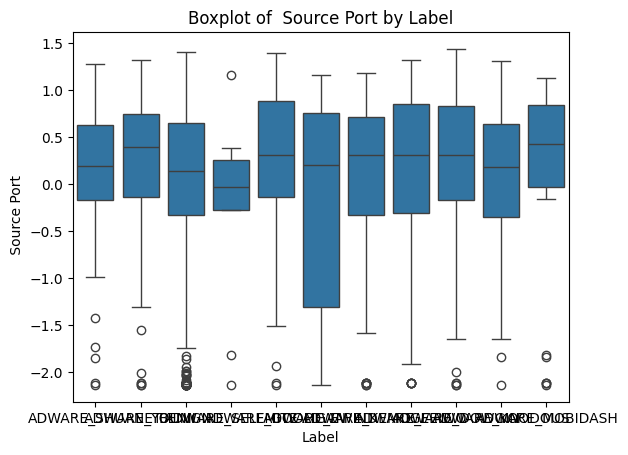

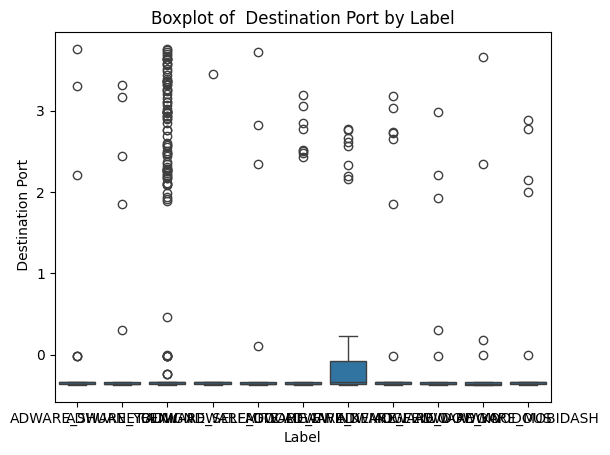

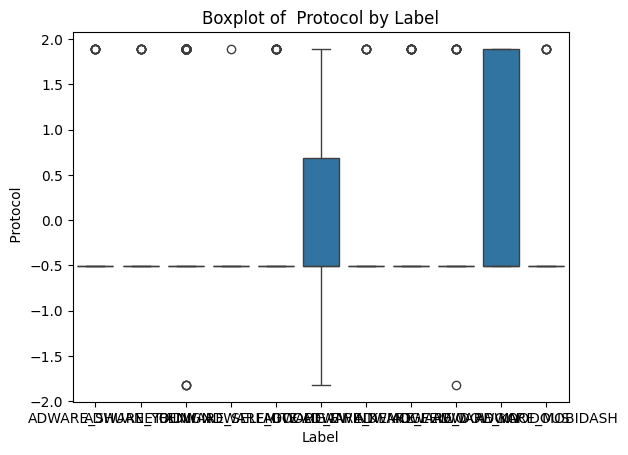

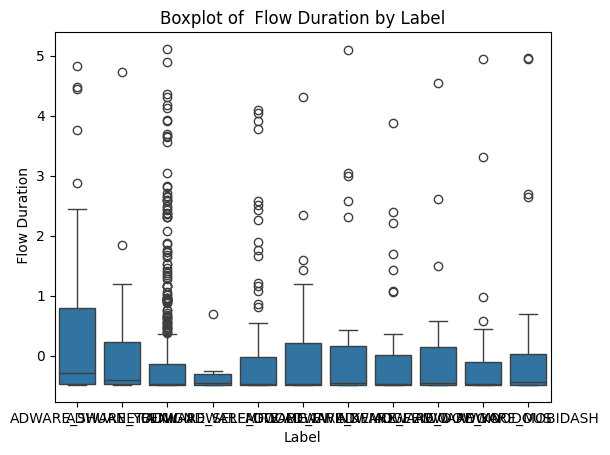

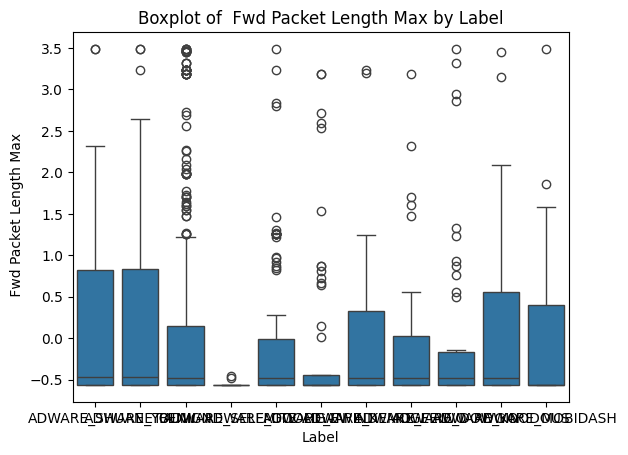

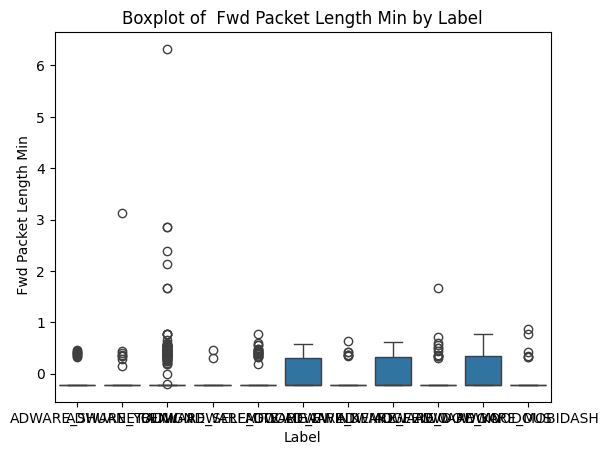

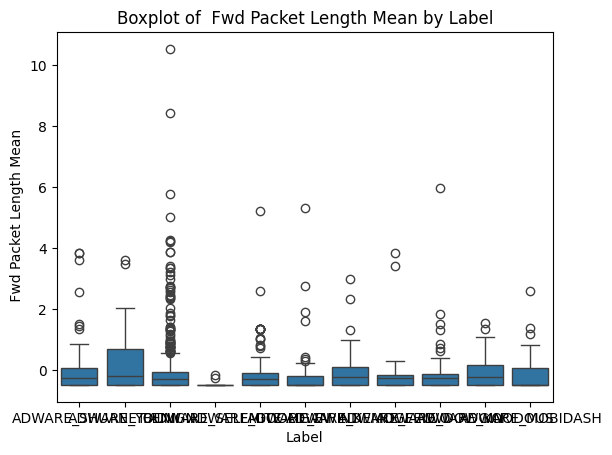

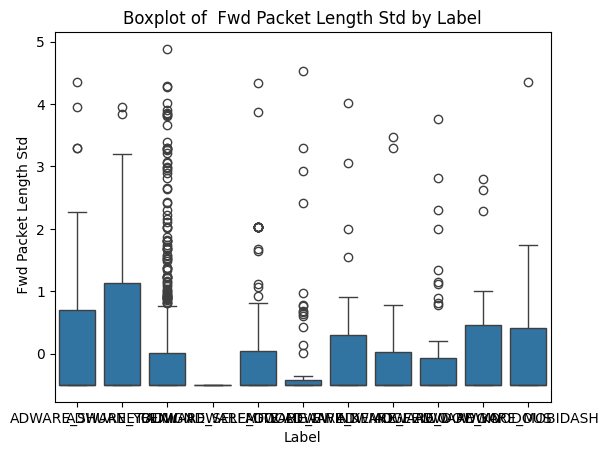

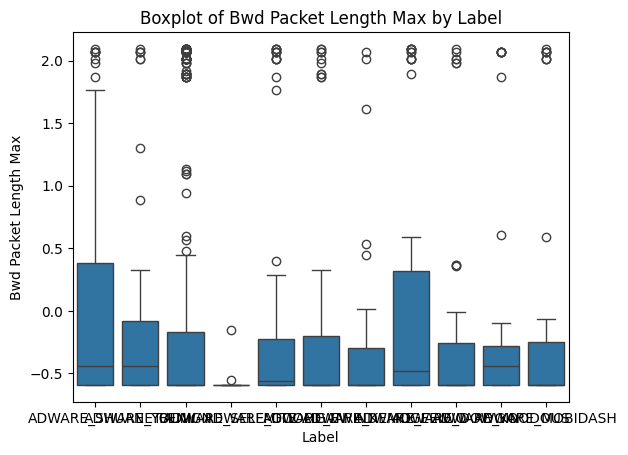

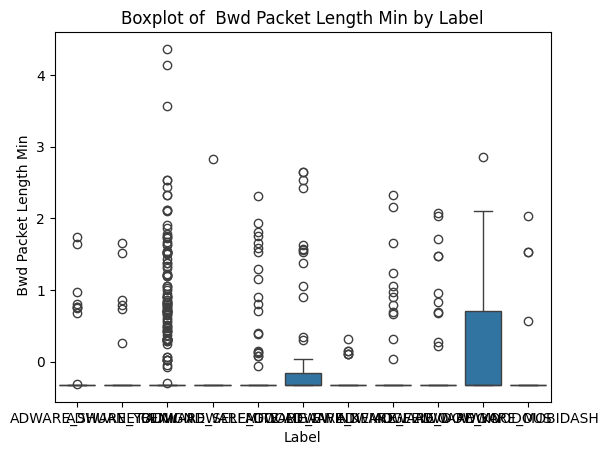

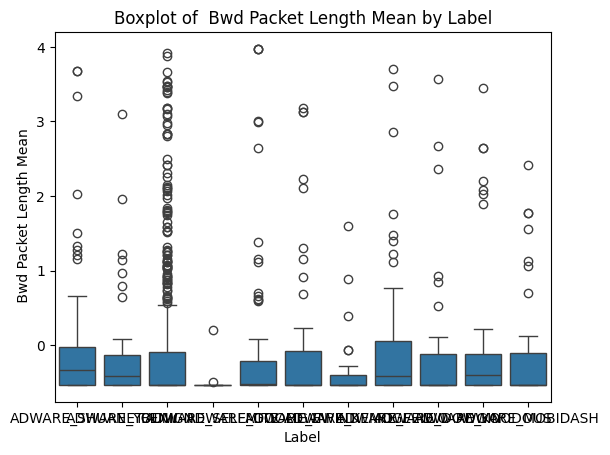

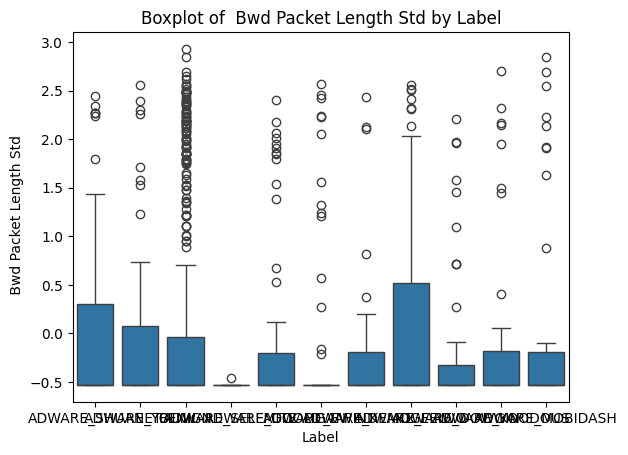

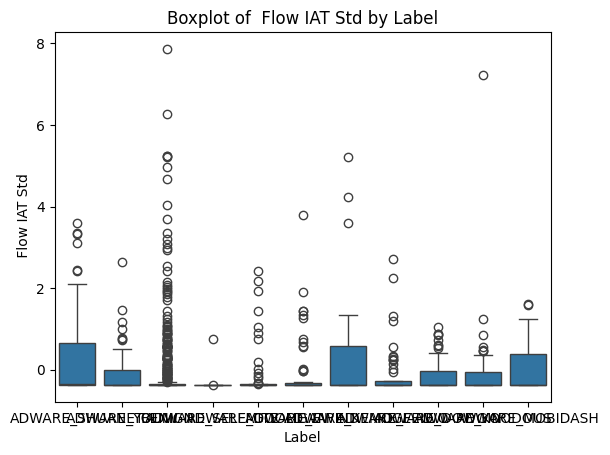

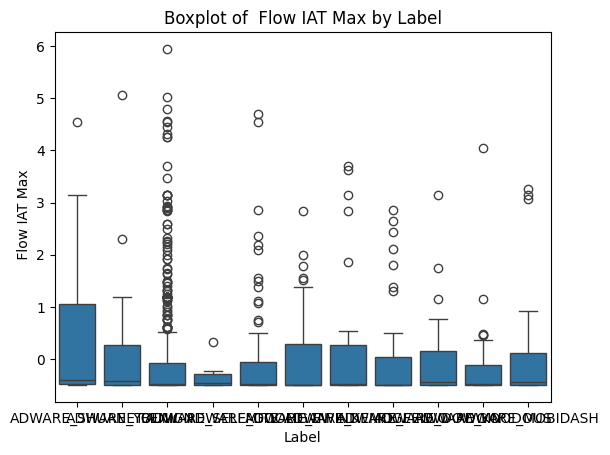

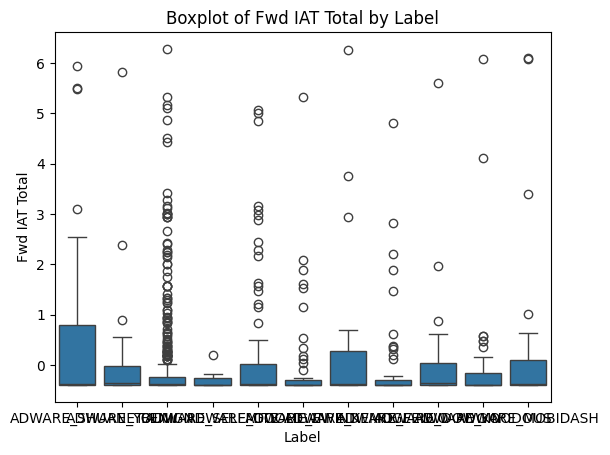

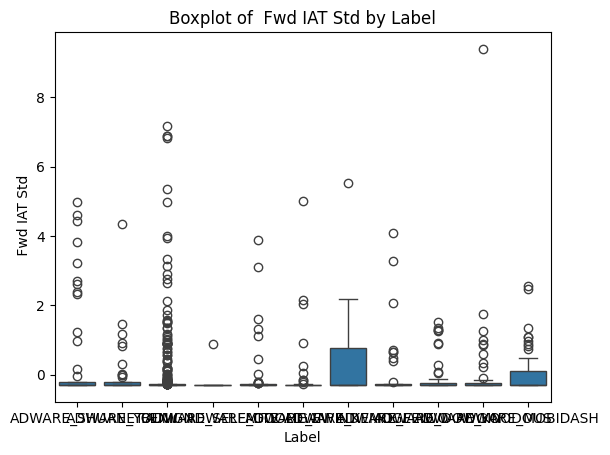

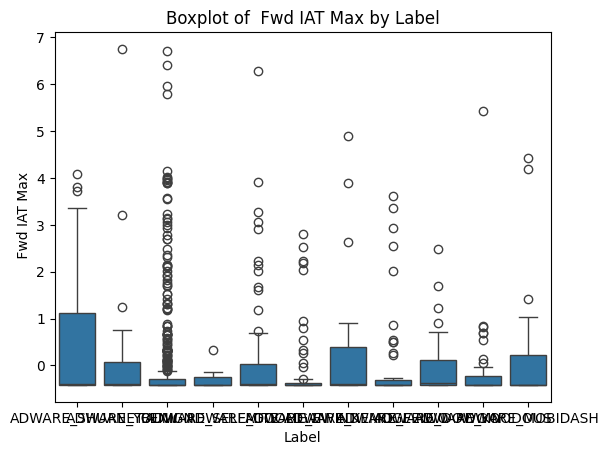

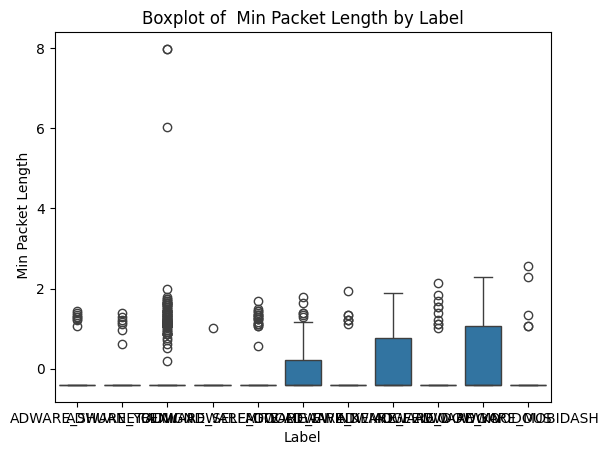

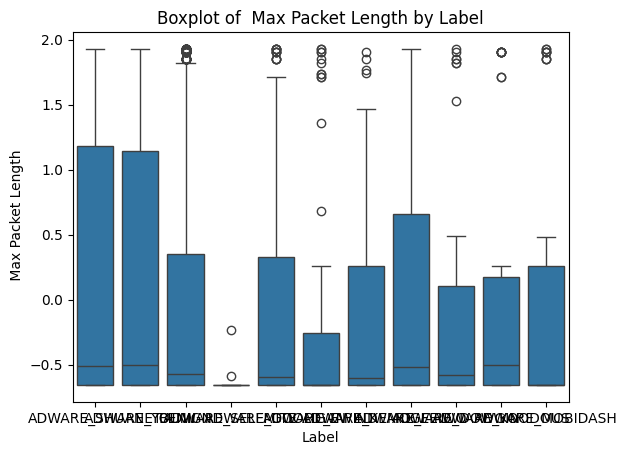

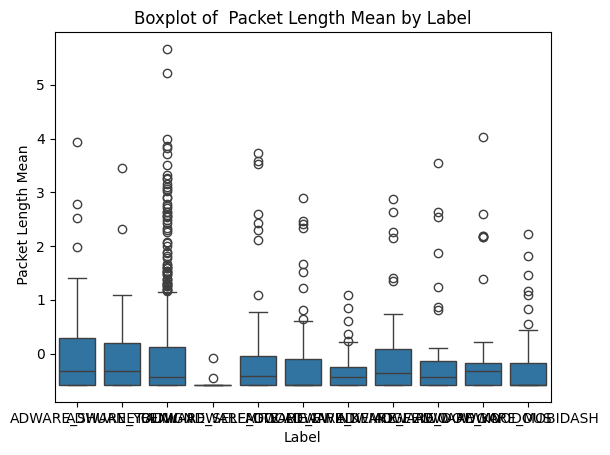

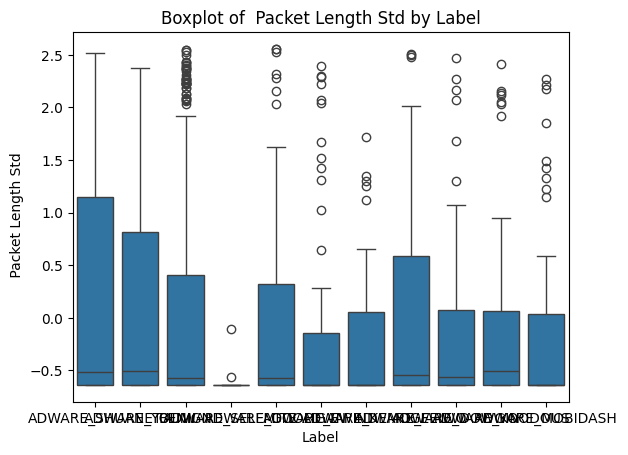

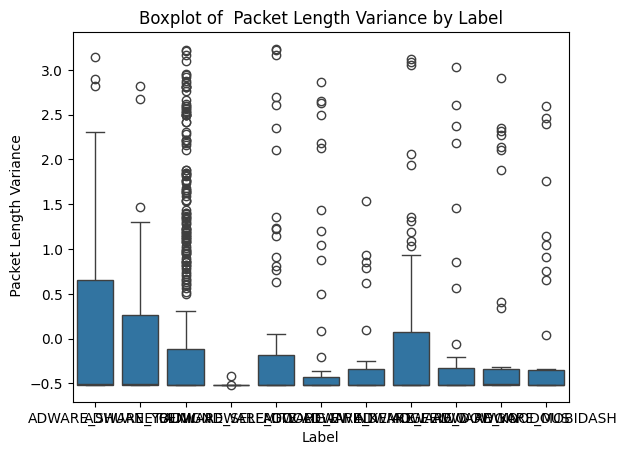

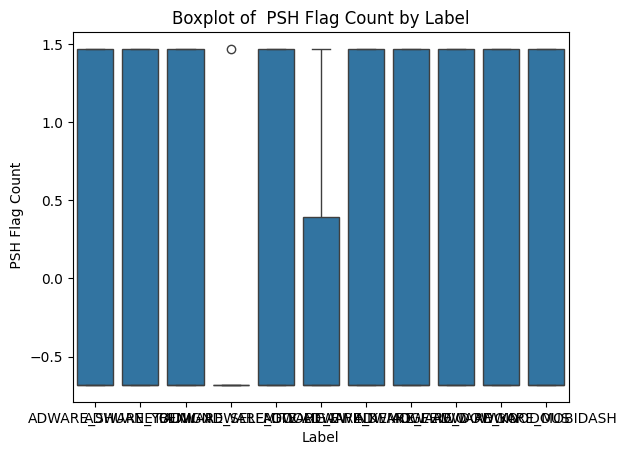

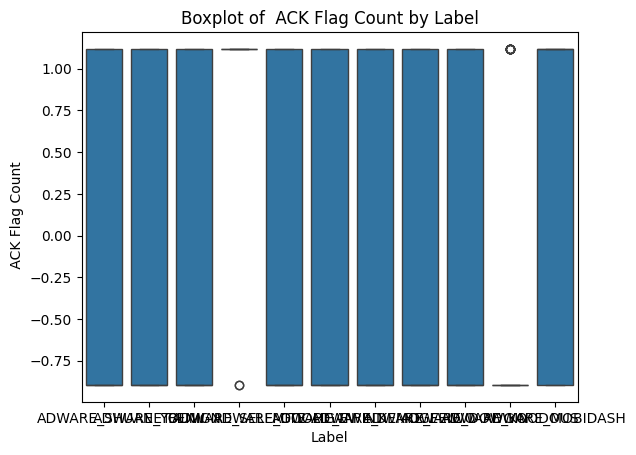

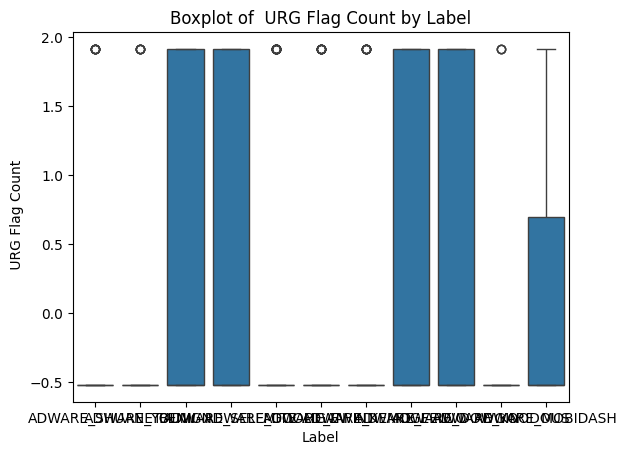

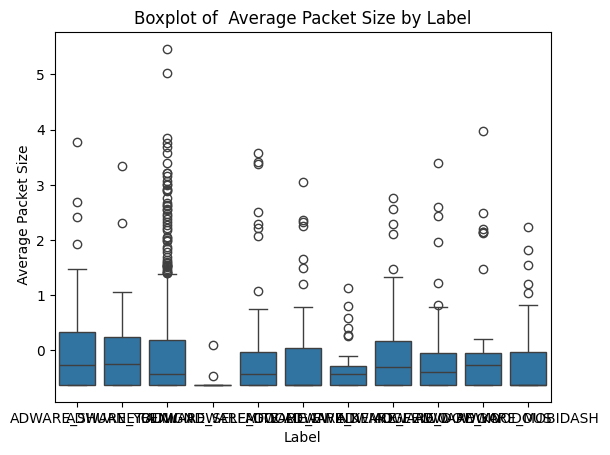

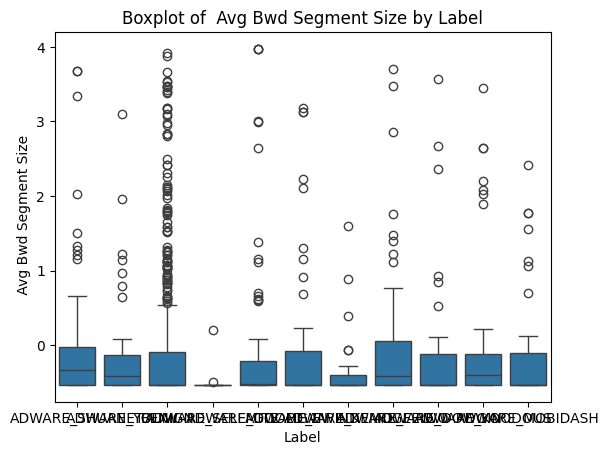

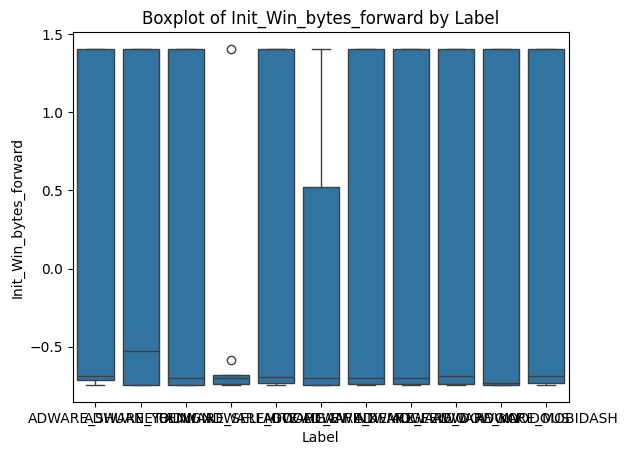

In [24]:
for feature in features_data:
    plt.figure()
    sns.boxplot(data=reduced_data, x='Label', y=feature)
    plt.title(f'Boxplot of {feature} by Label')
    plt.xlabel('Label')
    plt.ylabel(feature)
    plt.show()

### Chia data thành train/test data

In [25]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=69)

### Tạo, fit model

In [28]:
randforest_model = RandomForestClassifier(random_state=69)
randforest_model.fit(train_X, train_y)

RandomForestClassifier(random_state=69)

### Tính độ chính xác

In [29]:
preds_y  = randforest_model.predict(test_X)
print(accuracy_score(test_y, preds_y))

0.5803736694241609
